# Milestone 1

## Perkenalan

### Data Diri

Nama    : Ravin Mizia Rayeok

Program : FTDS

Batch   : 17

## Data Loading

`Dashboad tertera pada link berikut :`

https://datastudio.google.com/reporting/28c8e99d-d543-4e87-888a-5dc92a796d7a


Juga tertera pada file **M1_Dashboard.ipynb**

`Data yang diambil berasal dari Kaggle`

https://www.kaggle.com/datasets/mrmorj/big-mart-sales

**Tentang Dataset**


Data Scientist di Big Mart telah mengumpulkan data penjualan pada tahun 2013 untuk produk-produk toko Big Mart di berbagai kota, dan dengan segala variabel dan atributnya. Tujuannya adalah untuk membangun menganalisa penjualan dan memberkan rekomendasi yang terukur dan relevan.

Item_Identifier              = produk ID

Item_Weight                  = berat produk

Item_Fat_Content             = tingkat konten lemak

Item_Visibility              = presentase relativ display produk dibandingkan produk lain

Item_Type                    = kategori produk

Item_MRP                     = max harga retail produk

Outlet_Identifier            = outlet ID

Outlet_Establishment_Year    = tahun outlet didirikan

Outlet_Size                  = klasifikasi besarnya outlet

Outlet_Location_Type         = tipe kota

Outlet_Type                  = tipe outlet

Item_Outlet_Sales            = qty penjualan item di outlet

### Library 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sy
import scipy.stats as stats

In [2]:
df = pd.read_csv('big_mart_sales.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
df.shape

(8523, 12)

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# make all lowercase
df.columns = map(str.lower, df.columns)

In [7]:
df.nunique()

item_identifier              1559
item_weight                   415
item_fat_content                5
item_visibility              7880
item_type                      16
item_mrp                     5938
outlet_identifier              10
outlet_establishment_year       9
outlet_size                     3
outlet_location_type            3
outlet_type                     4
item_outlet_sales            3493
dtype: int64

## Data Cleaning

### Null Value Treatment

In [8]:
# mencari null value
df.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [9]:
# isi null values dengan median
df.item_weight=df['item_weight'].fillna(df['item_weight'].median())

c:\Users\ravin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item_weight', ylabel='Density'>

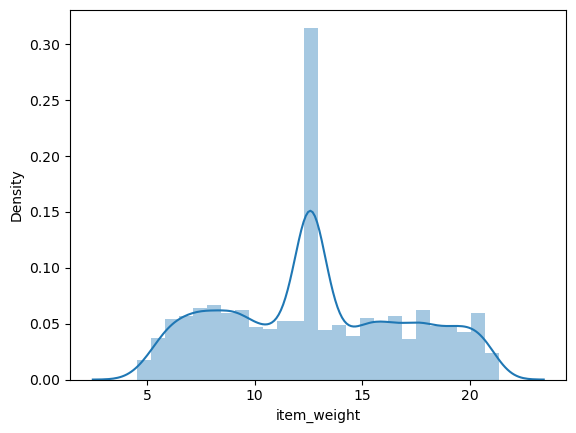

In [10]:
sns.distplot(df.item_weight)

Distribusi item weight pada kolom weight yang telah diisi nilai nullnya dengan median

In [11]:
print(df.item_weight.median())
print(df.item_weight.mean())
print(df.item_weight.mode()[0])


12.6
12.813419570574444
12.6


In [12]:
# cek value duplikat
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [14]:
df.isnull().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

### Manipulasi Tabel

In [15]:
# mengganti nama index ke 'index' agar dapat terbaca di LOOKER

df.index.name = 'index'

df

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
index,,,,,,,,,,,,
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8523 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
df.isnull().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [18]:
# ganti nama outet ke outlet size num

df.rename(columns = {'outlet_size':'outlet_size_num'}, inplace = True)

In [19]:
# Merubah nilai str pada kolom outtlet size num dari obejct ke numerical agar bisa dicari mode nya, lalu diisini null valuenya 

df['outlet_size_num'].replace({'Small':1,'Medium':2,"High":3}, inplace=True)

In [20]:
# mengisi jumlah outlet size dengan nilai mode

df.outlet_size_num.fillna(df.outlet_size_num.mode()[0], inplace=True)

In [21]:
# merubah kolom menjadi int
df.outlet_size_num = df.outlet_size_num.astype(int)

In [22]:
# plooting display style di notebook akan setting default
plt.style.use('default')


`CHECKING NULL VALUES AGAIN`

In [23]:
# NULL VALUES 

df.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size_num              0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

### Manipulasi kolom


In [24]:
df.head(3)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales
index,,,,,,,,,,,,
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700


In [25]:
# pembuatan kolom item total revenue
outlet_item_revenue = []
for i in df.index:
    outlet_item_revenue.append(df.item_mrp[i] * df.item_outlet_sales[i])


In [26]:

outlet_item_revenue = [round(item, 2) for item in outlet_item_revenue]

In [27]:
df = df.assign(outlet_item_revenue=outlet_item_revenue)

<AxesSubplot:>

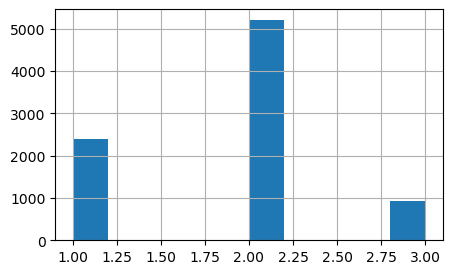

In [28]:
df.outlet_size_num.hist(figsize=(5,3))

In [29]:
# membuat column baru untuk klasifikasi outlet size dengan string data type ( Medium, Small, High)

df['outlet_size_str'] = df['outlet_size_num']

df.outlet_size_str.replace({1:'small',2:'medium',3:"high"}, inplace=True)

In [30]:
# re-arrange kolom agar lebih mudah dipahami

df = df[['item_identifier', 'item_weight','item_type' ,'item_fat_content', 'item_mrp','item_visibility', 'outlet_identifier','outlet_establishment_year','outlet_size_str','outlet_size_num','outlet_location_type','outlet_type','item_outlet_sales','outlet_item_revenue']]

In [31]:
df.head(3)

,item_identifier,item_weight,item_type,item_fat_content,item_mrp,item_visibility,outlet_identifier,outlet_establishment_year,outlet_size_str,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales,outlet_item_revenue
index,,,,,,,,,,,,,,
0,FDA15,9.30,Dairy,Low Fat,249.8092,0.016047,OUT049,1999,medium,2,Tier 1,Supermarket Type1,3735.1380,933071.84
1,DRC01,5.92,Soft Drinks,Regular,48.2692,0.019278,OUT018,2009,medium,2,Tier 3,Supermarket Type2,443.4228,21403.66
2,FDN15,17.50,Meat,Low Fat,141.6180,0.016760,OUT049,1999,medium,2,Tier 1,Supermarket Type1,2097.2700,297011.18


### Outlier Argumen

<AxesSubplot:>

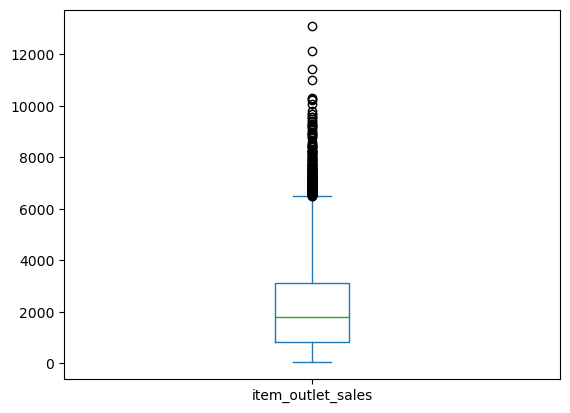

In [32]:
# plot box dari item sales

df.item_outlet_sales.plot(kind='box')

**Insight**

Menurut boxplot memang terlihat outlier, namun outlier memang adalah konsep yang subjektif (source : https://en.wikipedia.org/wiki/Outlier#:~:text=There%20is%20no%20rigid%20mathematical,is%20ultimately%20a%20subjective%20exercise.).

Dan kali ini penulis akan membiarkan outlier, dikarenakan subjeck dari outlier ini berada di kolom total penjualan.

Di dalam situasi supermarket, banyak sekali bnarang barang yang memang dibeli dalam jumlah yang banyak dan berkali kali, dan hal ini bisa mengakibatkan adanya outlier yang muncul pada boxplot.

## Data Explorasi

In [33]:
# jenis item type unique yang dijual
len(df.item_type.unique())

16

array([[<AxesSubplot:title={'center':'item_weight'}>,
        <AxesSubplot:title={'center':'item_mrp'}>,
        <AxesSubplot:title={'center':'item_visibility'}>],
       [<AxesSubplot:title={'center':'outlet_establishment_year'}>,
        <AxesSubplot:title={'center':'outlet_size_num'}>,
        <AxesSubplot:title={'center':'item_outlet_sales'}>],
       [<AxesSubplot:title={'center':'outlet_item_revenue'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

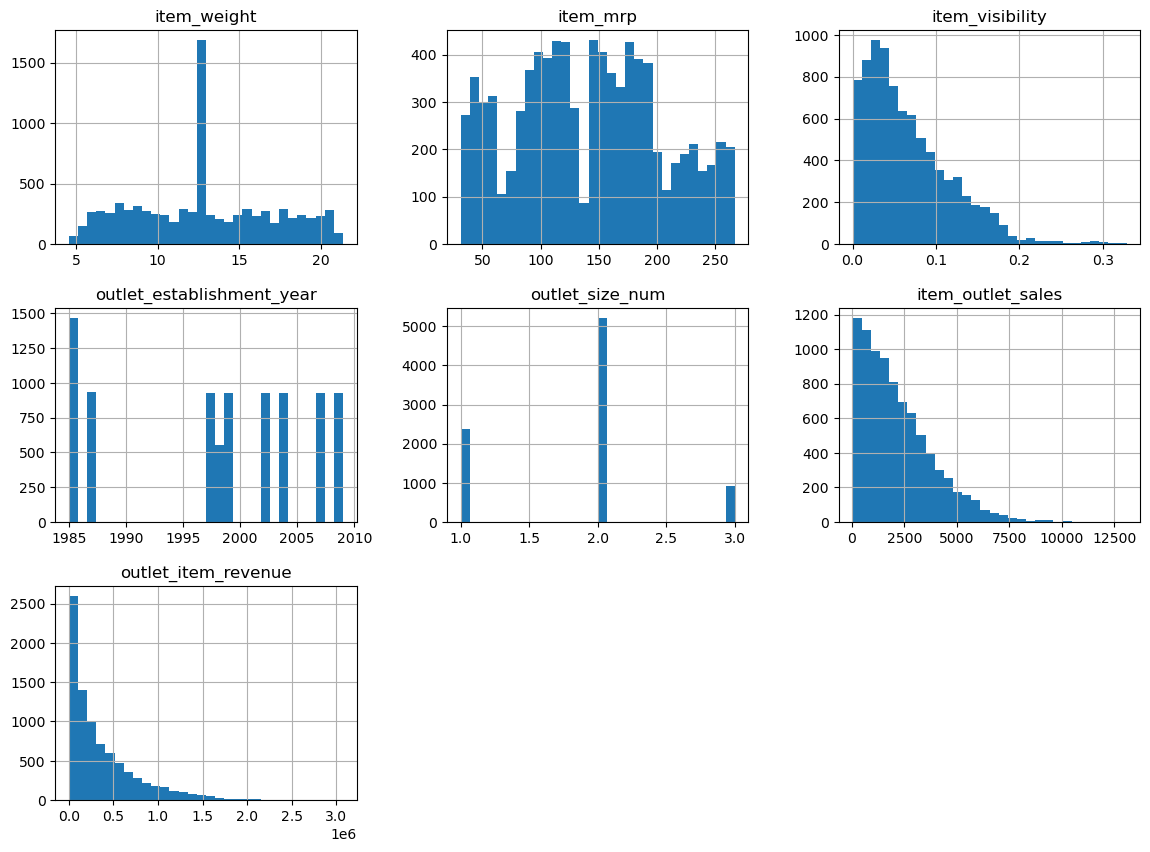

In [34]:
# membuat visualisasi data secara general berdasarkan count data

df.hist(figsize=(14,10), bins = 30)

**insight**

- dari gambar diatas dapat dilihat bentuk bentuk distribusi sekilas untuk semua kolom dalam dataframe. Dari visualisasi sederhana ini penulis bisa mendapatkan sedikit bayangan tentang overview data.


In [35]:
df.outlet_type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8523 non-null   float64
 2   item_type                  8523 non-null   object 
 3   item_fat_content           8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   item_visibility            8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size_str            8523 non-null   object 
 9   outlet_size_num            8523 non-null   int32  
 10  outlet_location_type       8523 non-null   object 
 11  outlet_type                8523 non-null   object 
 12  item_outlet_sales          8523 non-null   float64
 13  outlet_item_revenue        8523 non-null   float

In [37]:
df.head(3)

,item_identifier,item_weight,item_type,item_fat_content,item_mrp,item_visibility,outlet_identifier,outlet_establishment_year,outlet_size_str,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales,outlet_item_revenue
index,,,,,,,,,,,,,,
0,FDA15,9.30,Dairy,Low Fat,249.8092,0.016047,OUT049,1999,medium,2,Tier 1,Supermarket Type1,3735.1380,933071.84
1,DRC01,5.92,Soft Drinks,Regular,48.2692,0.019278,OUT018,2009,medium,2,Tier 3,Supermarket Type2,443.4228,21403.66
2,FDN15,17.50,Meat,Low Fat,141.6180,0.016760,OUT049,1999,medium,2,Tier 1,Supermarket Type1,2097.2700,297011.18


In [38]:
df.tail(3)

,item_identifier,item_weight,item_type,item_fat_content,item_mrp,item_visibility,outlet_identifier,outlet_establishment_year,outlet_size_str,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales,outlet_item_revenue
index,,,,,,,,,,,,,,
8520,NCJ29,10.60,Health and Hygiene,Low Fat,85.1224,0.035186,OUT035,2004,small,1,Tier 2,Supermarket Type1,1193.1136,101560.69
8521,FDN46,7.21,Snack Foods,Regular,103.1332,0.145221,OUT018,2009,medium,2,Tier 3,Supermarket Type2,1845.5976,190342.39
8522,DRG01,14.80,Soft Drinks,Low Fat,75.4670,0.044878,OUT046,1997,small,1,Tier 1,Supermarket Type1,765.6700,57782.82


In [39]:
# sejarah tahun awal didirikannya toko

print(df.outlet_establishment_year.min())
print(df.outlet_establishment_year.max())

1985
2009


In [40]:
# oksplorasi singkat untuk jumlah outlet
print('Jumlah outlet High   : ',len(df[df['outlet_size_str'] == 'high']))
print('Jumlah outlet medium : ',len(df[df['outlet_size_str'] == 'medium']))
print('Jumlah outlet Small  : ',len(df[df['outlet_size_str'] == 'small']))

Jumlah outlet High   :  932
Jumlah outlet medium :  5203
Jumlah outlet Small  :  2388


## Problem Statement dan Penjabaran Masalah

PS : Problem Statement : Franchise Toko Big Store sedang mengalami kemunduran revenue, dari data, buatlah analisa dan rekomendasi sesuai kebutuhan. 

1. Rata Rata penjualan menurut spesifikasi toko dan lokasi
2. Bagaimana korelasi antara kategori produk, total penjualan dan variasi produk?
3. Bagaimana secara umum pembagian visibilitas produk di toko?
4. Bagaimana penjualan dengan kategori lemak low fat?
5. Supermarket tipe apa yang menjual item lowfat terbanyak?
6. Bagaimana korelasi antara penjualan dan harga maksimum dari suatu kategori item?


## Analisa Visual & Descriptive Statistics

### 1. Rata Rata penjualan menurut spesifikasi toko dan lokasi

In [41]:
df.head(3)

,item_identifier,item_weight,item_type,item_fat_content,item_mrp,item_visibility,outlet_identifier,outlet_establishment_year,outlet_size_str,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales,outlet_item_revenue
index,,,,,,,,,,,,,,
0,FDA15,9.30,Dairy,Low Fat,249.8092,0.016047,OUT049,1999,medium,2,Tier 1,Supermarket Type1,3735.1380,933071.84
1,DRC01,5.92,Soft Drinks,Regular,48.2692,0.019278,OUT018,2009,medium,2,Tier 3,Supermarket Type2,443.4228,21403.66
2,FDN15,17.50,Meat,Low Fat,141.6180,0.016760,OUT049,1999,medium,2,Tier 1,Supermarket Type1,2097.2700,297011.18


In [42]:
small_outlet = df[df.outlet_size_str=='small']
medium_outlet = df[df.outlet_size_str=='medium']
high_outlet = df[df.outlet_size_str=='high']

In [43]:
# analisa deskriptif distribusi size toko dan kota

print('Small outlet terletak paling banyak di kota  : ',small_outlet.outlet_size_num.mode()[0])
print('Medium outlet terletak paling banyak di kota : ',medium_outlet.outlet_size_num.mode()[0])
print('High outlet terletak paling banyak di kota   : ',high_outlet.outlet_size_num.mode()[0])

Small outlet terletak paling banyak di kota  :  1
Medium outlet terletak paling banyak di kota :  2
High outlet terletak paling banyak di kota   :  3


In [44]:
# mean dari masing masing size outlet

print('Rata rata revenue dari tipe outlet selama berdiri')

print('Rata rata penjualan outlet small     : ',round(df[df.outlet_size_str=='small']['outlet_item_revenue'].mean(),2), 'USD')
print('Rata rata penjualan outlet medium    : ',round(df[df.outlet_size_str=='medium']['outlet_item_revenue'].mean(),2), 'USD')
print('Rata rata penjualan outlet high      : ',round(df[df.outlet_size_str=='high']['outlet_item_revenue'].mean(),2), 'USD')

Rata rata revenue dari tipe outlet selama berdiri
Rata rata penjualan outlet small     :  323581.52 USD
Rata rata penjualan outlet medium    :  383630.63 USD
Rata rata penjualan outlet high      :  393237.4 USD


In [45]:
df_sizes = df.loc[:,['outlet_size_str','outlet_item_revenue']]

Text(0.5, 0.98, 'Avg Product Sales by Outlet Size')

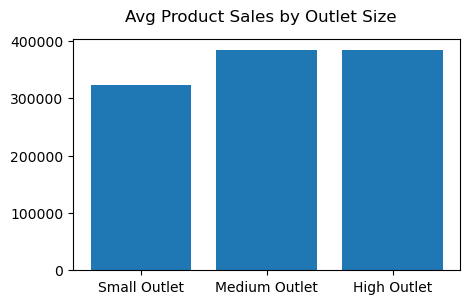

In [46]:
# plotting rata rata penjualan berasarkan size outlet

data = {'Small Outlet': small_outlet.outlet_item_revenue.mean(), 'Medium Outlet': medium_outlet.outlet_item_revenue.mean(), 'High Outlet': medium_outlet.outlet_item_revenue.mean()}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(5, 3), sharey=True)
axs.bar(names, values)

fig.suptitle('Avg Product Sales by Outlet Size')

**Insight** 

- Rata rata revenue dari masing masing kelas outlet terlihat hampir sama walaupun jumlah outlet dari masing masing kategori berbeda dan tanggal didirikannya berbeda.
- outlet pertama yang dibangun adalah outlet dengan kelas medium diahun 1985 (diasumsikan dari median data)
- Jadi ukuran outlet tidak memiliki efek signifikan terhadap penjualan

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Grocery Store'),
  Text(1, 0, 'Supermarket Type1'),
  Text(2, 0, 'Supermarket Type2'),
  Text(3, 0, 'Supermarket Type3')])

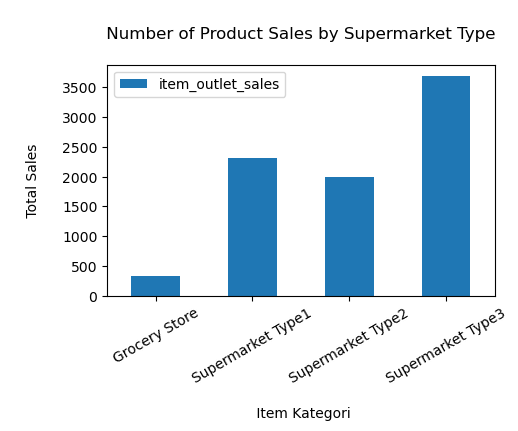

In [47]:
# plotting rata rata penjualan berasarkan tipe outlet

df_sup = df.loc[:,('item_outlet_sales','outlet_type')].groupby('outlet_type').mean()

df_sup.plot(figsize=(5,3),kind='bar', title= '\n Number of Product Sales by Supermarket Type \n',xlabel='\n Item Kategori',ylabel='\n Total Sales \n')
plt.xticks(rotation = 30)

**Insight**

- Rata-rata penjualan di supermarket type 3 lebih banyak dibandingkan type outlet yang lain dan tipe grocery store memang adalah tipe yang paling sedikit pemasukannya


<AxesSubplot:title={'center':'\n Number of Product Sales by City Type \n'}, xlabel='Item Kategori', ylabel='Total Sales'>

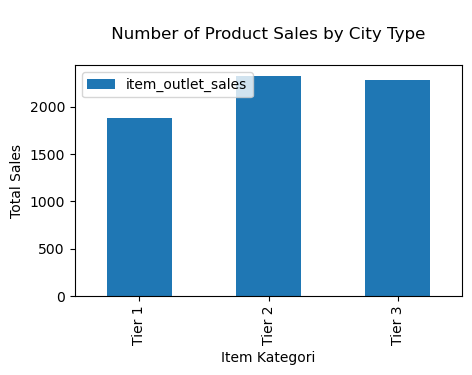

In [48]:
# plotting rata rata penjualan berasarkan lokasi tier kota

df_city = df.loc[:,('item_outlet_sales','outlet_location_type')].groupby('outlet_location_type').mean()

df_city.plot(figsize=(5,3),kind='bar', title= '\n Number of Product Sales by City Type \n',xlabel='Item Kategori',ylabel='Total Sales')


**Insight Poin 1**

- digabungkan dari data di plot 1 , penjualan memang lebih tinggi jika memiliki tipe outlet seperti supermarket type 3. 

- Dan untuk plot 2 dan 3, faktor size outlet dan lokasi kota outlet sepertinya tidak berperan signifikan terhadap penjualan.

### 2. Korelasi Kategori Produk, Total Penjualan dan Variasi Produk

In [49]:
df.head(3)

,item_identifier,item_weight,item_type,item_fat_content,item_mrp,item_visibility,outlet_identifier,outlet_establishment_year,outlet_size_str,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales,outlet_item_revenue
index,,,,,,,,,,,,,,
0,FDA15,9.30,Dairy,Low Fat,249.8092,0.016047,OUT049,1999,medium,2,Tier 1,Supermarket Type1,3735.1380,933071.84
1,DRC01,5.92,Soft Drinks,Regular,48.2692,0.019278,OUT018,2009,medium,2,Tier 3,Supermarket Type2,443.4228,21403.66
2,FDN15,17.50,Meat,Low Fat,141.6180,0.016760,OUT049,1999,medium,2,Tier 1,Supermarket Type1,2097.2700,297011.18


In [50]:
df.item_type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

<AxesSubplot:title={'center':'\n Rata-rata penjualan item low fat \n'}, ylabel='Item Kategori'>

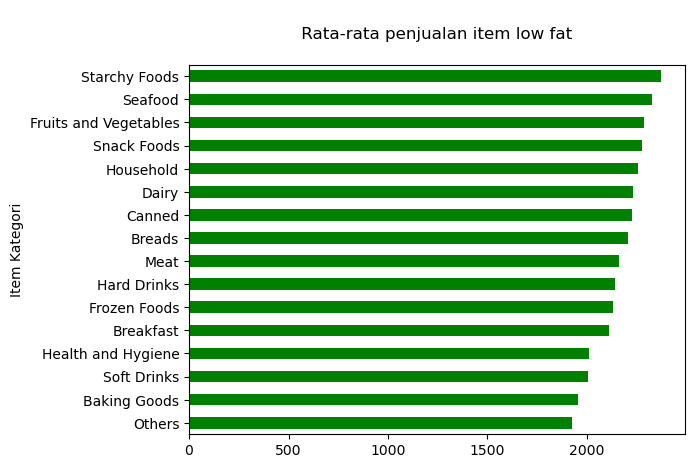

In [51]:
# pembuatan bar chart, Rata rata penjualan kategori item yang berbeda beda

df_items = df.loc[:,['item_outlet_sales','item_type']].groupby('item_type').mean()
df_items['item_outlet_sales'].sort_values().plot(kind='barh', title= '\n Rata-rata penjualan item low fat \n',xlabel='Item Kategori',ylabel='Total Sales', color='green')


**insight**

 - dalam grafik sekilas memperlihatkan RATA RATA penjualan setiap item disemua toko. Dan penjualan terbanyak adalah di ketgori starchy food dan diikuti oleh seafood.

In [52]:
# pembuatan tabel korelasi

corr_id_sale = df.loc[:,('item_identifier','item_type')].groupby('item_type').count()

corr_id_sale['item_outlet_sale'] =  df.loc[:,('item_identifier','item_outlet_sales','item_type')].groupby('item_type').mean()

corr_id_sale

,item_identifier,item_outlet_sale
item_type,,
Baking Goods,648,1952.971207
Breads,251,2204.132226
Breakfast,110,2111.808651
Canned,649,2225.194904
Dairy,682,2232.542597
Frozen Foods,856,2132.867744
Fruits and Vegetables,1232,2289.009592
Hard Drinks,214,2139.221622
Health and Hygiene,520,2010.000265


<AxesSubplot:xlabel='item_identifier', ylabel='item_outlet_sale'>

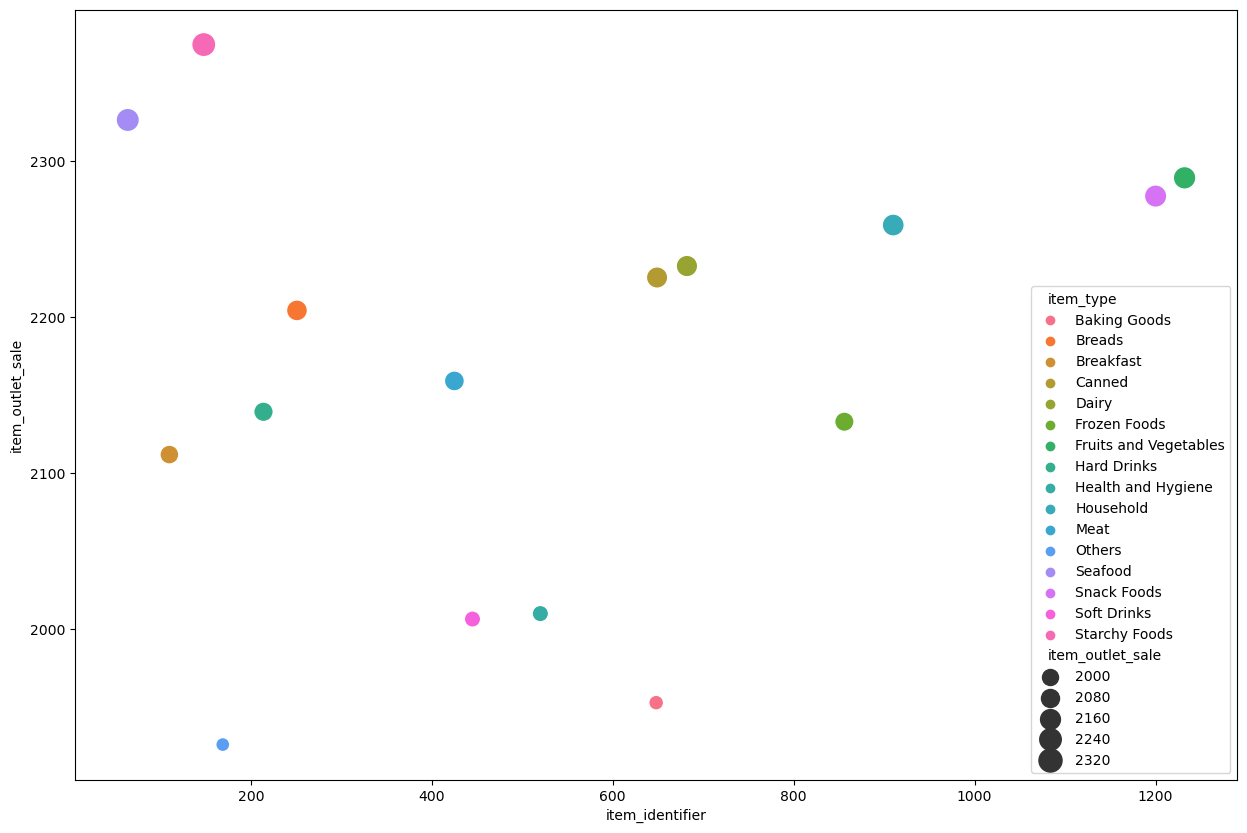

In [53]:
# membuat plot korelasi antara variasi item dengan total penjualan!

fig= plt.subplots(figsize=(15, 10))

sns.scatterplot(data=corr_id_sale, x='item_identifier', y= 'item_outlet_sale', hue='item_type',palette="husl",sizes=(100, 300),size=('item_outlet_sale'))



**Insight**

- Penjualan terbanyak dari item buah buahan dan sayuran lalu diikuti degan snack foods
- Item Seafood dan Starchy food memiliki VARIASI yang RENDAH tetapi memiliki tingkat PENJUALAN yang TINGGI, ini bisa menjadi poin improvement untuk toko Big Mart

### 3. Bagaimana secara umum pembagian visibilitas produk di toko?

In [54]:
df.head(3)

,item_identifier,item_weight,item_type,item_fat_content,item_mrp,item_visibility,outlet_identifier,outlet_establishment_year,outlet_size_str,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales,outlet_item_revenue
index,,,,,,,,,,,,,,
0,FDA15,9.30,Dairy,Low Fat,249.8092,0.016047,OUT049,1999,medium,2,Tier 1,Supermarket Type1,3735.1380,933071.84
1,DRC01,5.92,Soft Drinks,Regular,48.2692,0.019278,OUT018,2009,medium,2,Tier 3,Supermarket Type2,443.4228,21403.66
2,FDN15,17.50,Meat,Low Fat,141.6180,0.016760,OUT049,1999,medium,2,Tier 1,Supermarket Type1,2097.2700,297011.18


In [55]:
# item lowfat dengan visibilty tertinggi 
df_vis = df.loc[:,['item_type','item_visibility']].groupby('item_type').mean()
df_vis = df.loc[:,['item_type','item_visibility']].groupby('item_type').mean()
df_vis = df.loc[:,['item_type','item_visibility']].groupby('item_type').mean()


df_vis.sort_values(by = 'item_visibility', ascending=False)


,item_visibility
item_type,
Breakfast,0.085723
Seafood,0.074976
Dairy,0.072427
Baking Goods,0.069169
Fruits and Vegetables,0.068513
Canned,0.068129
Starchy Foods,0.067564
Snack Foods,0.066850
Breads,0.066255


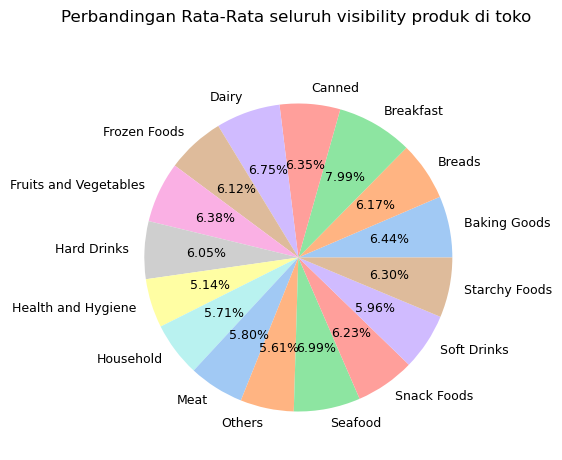

In [56]:
# pembuatan pie chart untuk visibilitas produk 

x = df_vis['item_visibility'].tolist()
labels = df_vis.index.tolist()
data = df_vis
textprops = {"fontsize":9}
plt.figure(figsize=(20,5))
plt.pie(x= x,data= data , labels = labels , colors = sns.color_palette('pastel') , autopct='%.2f%%', textprops =textprops)     
plt.title('Perbandingan Rata-Rata seluruh visibility produk di toko \n\n')
plt.show()

**Insight**

- Rata rata produk yang memiliki visibilitas yang paling tinggi adalah kategori breakfast dengan 8% lalu yang paling rendah visibilitas nya adalah health and hygiene.
- Kemungkinan besar dimensi produk health and hygiene lebih kecil dan breakfast lebih tinggi, contohnya hygiene : shampoo, sabun, sikat gigi dll.

### 4. Presentase Trend Revenue Penjualan menurut kategori kandungan lemak

In [57]:
df.head(3)

,item_identifier,item_weight,item_type,item_fat_content,item_mrp,item_visibility,outlet_identifier,outlet_establishment_year,outlet_size_str,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales,outlet_item_revenue
index,,,,,,,,,,,,,,
0,FDA15,9.30,Dairy,Low Fat,249.8092,0.016047,OUT049,1999,medium,2,Tier 1,Supermarket Type1,3735.1380,933071.84
1,DRC01,5.92,Soft Drinks,Regular,48.2692,0.019278,OUT018,2009,medium,2,Tier 3,Supermarket Type2,443.4228,21403.66
2,FDN15,17.50,Meat,Low Fat,141.6180,0.016760,OUT049,1999,medium,2,Tier 1,Supermarket Type1,2097.2700,297011.18


In [58]:
# value unique jenis kadar lemak
df.item_fat_content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [59]:
# merubah LF dan reg menjadi Lowfat dan Regular supaya simple
df.item_fat_content = df.item_fat_content.replace(['LF','reg','low fat'], ['Low Fat','Regular','Low Fat'])

df.item_fat_content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [60]:
# total revenue penjualan fat product di tahun 2000
df_lowfat =df[df['item_fat_content']=='Low Fat']
df_regularfat =df[df['item_fat_content']=='Regular']

print('Total revenue penjualan low fat produk pada tahun 2000 adalah     : ',df_lowfat[(df_lowfat.outlet_establishment_year >= 1985) & (df_lowfat.outlet_establishment_year <= 2009)].item_outlet_sales.sum() )
print('Total revenue penjualan regular fat produk pada tahun 2000 adalah : ',df_regularfat[(df_regularfat.outlet_establishment_year >= 1985) & (df_regularfat.outlet_establishment_year <= 2009)].item_outlet_sales.sum())

Total revenue penjualan low fat produk pada tahun 2000 adalah     :  11904094.533
Total revenue penjualan regular fat produk pada tahun 2000 adalah :  6687030.877400001


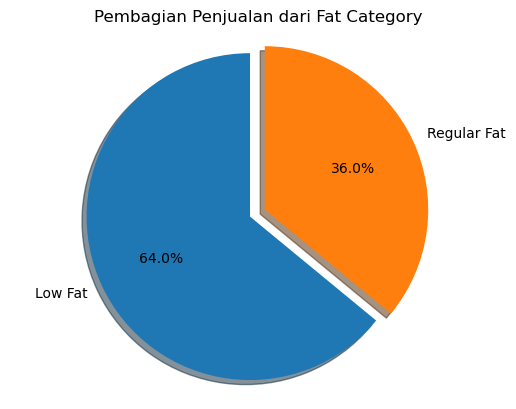

In [61]:
# pembuatan pie chart 

pie_fat = [11904094.533,6687030.877400001] # diambil dari perhitungan cell sebelumnya


labels = 'Low Fat', 'Regular Fat'
sizes = pie_fat
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode =explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('Pembagian Penjualan dari Fat Category')

plt.show()

**Insight**

- Dari Seluruh revenue yang didapat dari semua outlet pada tahun 2013, item dengan kadar fat rendah ialah item dengan kategori paling banyak menghasilkan revenue
- Ini bisa menjadi rujukan potensi bagi Big Mart

### 5. Supermarket tipe apa yang menjual item lowfat terbanyak?

In [62]:
df.head(3) 

,item_identifier,item_weight,item_type,item_fat_content,item_mrp,item_visibility,outlet_identifier,outlet_establishment_year,outlet_size_str,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales,outlet_item_revenue
index,,,,,,,,,,,,,,
0,FDA15,9.30,Dairy,Low Fat,249.8092,0.016047,OUT049,1999,medium,2,Tier 1,Supermarket Type1,3735.1380,933071.84
1,DRC01,5.92,Soft Drinks,Regular,48.2692,0.019278,OUT018,2009,medium,2,Tier 3,Supermarket Type2,443.4228,21403.66
2,FDN15,17.50,Meat,Low Fat,141.6180,0.016760,OUT049,1999,medium,2,Tier 1,Supermarket Type1,2097.2700,297011.18


In [63]:
df.outlet_location_type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [64]:
df_lowfat_sm_type = df_lowfat.loc[:,['item_type','outlet_type']].groupby('outlet_type').count() 

df_lowfat_sm_type


,item_type
outlet_type,
Grocery Store,705
Supermarket Type1,3609
Supermarket Type2,598
Supermarket Type3,605


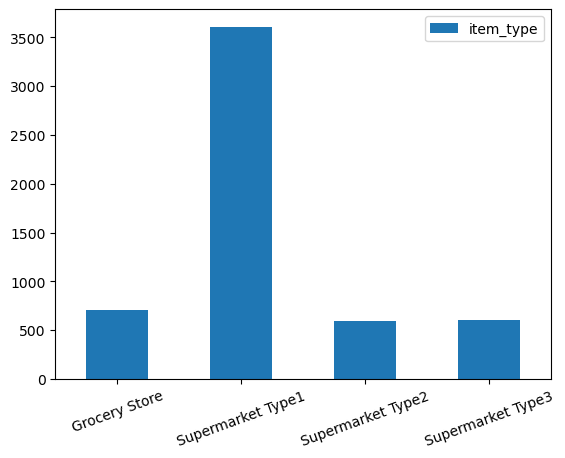

In [65]:
df_lowfat_sm_type.plot(kind=('bar'))
plt.xticks(rotation = 20, labels=None)
plt.xlabel('')
plt.show()

**Insight**

Di supermarket type 1 ternyata banyak sekali produk lowfat yang dijual dari berbagai macam tipe. Ini juga selaras dengan rata rata penjualan per supermarket diaman supermatket 1 memiliki penjualan terbanyak.
Korelasi poin ini adalah, ternyata di toko pun, memang produk kategori lowfat menjadi barang paling banyak variasinya dan jumlah penjualaannya.

### 6. Bagaimana korelasi antara penjualan dan harga maksimum dari suatu kategori item?

In [66]:
df_6 = df.loc[:,('item_mrp','item_outlet_sales','item_type')].groupby('item_type').mean()

df_6

,item_mrp,item_outlet_sales
item_type,,
Baking Goods,126.380766,1952.971207
Breads,140.952669,2204.132226
Breakfast,141.788151,2111.808651
Canned,139.763832,2225.194904
Dairy,148.499208,2232.542597
Frozen Foods,138.503366,2132.867744
Fruits and Vegetables,144.581235,2289.009592
Hard Drinks,137.077928,2139.221622
Health and Hygiene,130.818921,2010.000265


<AxesSubplot:xlabel='item_mrp', ylabel='item_outlet_sales'>

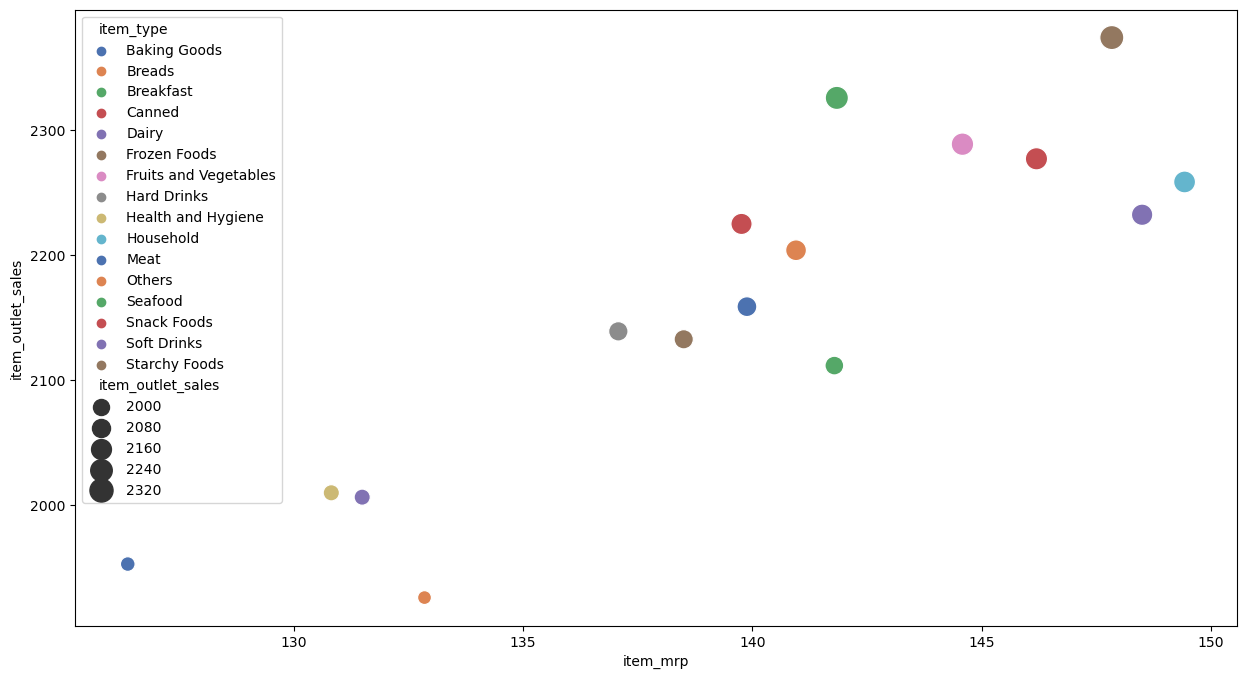

In [67]:
# plotting scatter plot korelasi antara harga barang dengan penjualan

fig= plt.subplots(figsize=(15, 8))

sns.scatterplot(data=df_6, x='item_mrp', y= 'item_outlet_sales', hue='item_type',palette="deep", size=('item_outlet_sales'), sizes=(100,300))

**Insight**

Dari scatter plot ini dapat disimpulkan bahwa adanya korelasi yang cukup tinggi dari harga item maksimum retail (item_mrp) dan penjualan di seluruh outllet. 

Semakin tinggi harga maksimum suatu item semakin tinggi pula tingkat penjualannya


In [68]:
# membuat dataframe korelasi

df_corr_count_qty = df.loc[:,['item_mrp','item_outlet_sales','item_type']].groupby('item_type').mean() 

df_corr_count_qty

,item_mrp,item_outlet_sales
item_type,,
Baking Goods,126.380766,1952.971207
Breads,140.952669,2204.132226
Breakfast,141.788151,2111.808651
Canned,139.763832,2225.194904
Dairy,148.499208,2232.542597
Frozen Foods,138.503366,2132.867744
Fruits and Vegetables,144.581235,2289.009592
Hard Drinks,137.077928,2139.221622
Health and Hygiene,130.818921,2010.000265


In [69]:
# menghitung korelasi antara harga max item dan tingkat penjualannya

print('Korelasi antara harga max item dan penjualan adalah  :', df_corr_count_qty.item_outlet_sales.corr(df_corr_count_qty.item_mrp))

Korelasi antara harga max item dan penjualan adalah  : 0.879505745982249


**Insight** 

- Terlihat dari total rata rata penjualan item yang tersebar disetiap toko dan harga maksimum sepertinya memang berkorelasi positif, jadi tingginya harga maksimum tidak menyebabkan adanya penurunan penjualan secara umum. 

## Kesimpulan

- Kesimpulan :

    - Pada poin pertama, ada keterkaitan antara penjualan dan jenis toko, namun keterkaitan antara penjualan dan lokasi kota maupun ukuran toko tidak terlihat signifikan.

    - Untuk mempertajam analisa maka kita buat dipoin ke 2 yaitu korelasi antara varaisi produk dan total penjualannya. Yang menarik adalah porduk dengan kategori seafood dan starchy food. Walaupun memiliki tingkat variasi yang rendah, namun tingkat penjualannya rata rata tinggi. Ini juga bisa menjadi poin penting untuk toko.
    - Poin ketiga adalah analisis visibilitas. Dari sini bisa kita dapatkan kesimpulan kalau visibilitas produk memang berbeda namun tidak terlalu signifikan. Poin menariknya adalah penjualan rata rata tertinggi adalah bagian starchy food, namun visibilitas produk tidak teralu signifikan. Ini menandakan adanya potensi yang bisa dimanfaatkan juga poin untuk toko.
    - Lalu dilanjutkan untuk untuk analisa tingkat lemak dan penjualan, ternyata selama tahun 2013 ini, penjualan yang paling banyak dibeli adalah barang barang dengan kategori rendah lemak. Ini bisa dijadikan rujukan trend untuk memprediksi penjualan kedepan

    - Dilanjutkan dengan analisa : supermarket mana yang memilikipenjualan lowfat terbanyak, dan jawabannya adalah supermarket tipe 1. Ini sekaligus membuktikan kalau supermarket dengan penjualan terbanyak, juga memiliki trend yang sama yaitu penjualan item dengan tingkat lemak rendah.

    - Dan kemudian, pada analisa korelasi antar penjualan dan harga maksimum, didapat bahwa justru adanya korelasi positif antara tingkat penjualan dan harga maksimum retail. Poin ini sangat berarti bagi toko, karena secara tidak langsung dapat memberikan insight untuk mereview kembali harga harga yang ada.

## Inferential Statistics

1. Nah sekarang jikalau kita harus menentukan rata rata kenaikan harga, sampai mana batas harga yang bisa diseut "kenaikan"
 - kita bisa jawab ini dengan menggunakan konsep confidence interval dari inferential statistics

In [70]:
df.head()

,item_identifier,item_weight,item_type,item_fat_content,item_mrp,item_visibility,outlet_identifier,outlet_establishment_year,outlet_size_str,outlet_size_num,outlet_location_type,outlet_type,item_outlet_sales,outlet_item_revenue
index,,,,,,,,,,,,,,
0,FDA15,9.30,Dairy,Low Fat,249.8092,0.016047,OUT049,1999,medium,2,Tier 1,Supermarket Type1,3735.1380,933071.84
1,DRC01,5.92,Soft Drinks,Regular,48.2692,0.019278,OUT018,2009,medium,2,Tier 3,Supermarket Type2,443.4228,21403.66
2,FDN15,17.50,Meat,Low Fat,141.6180,0.016760,OUT049,1999,medium,2,Tier 1,Supermarket Type1,2097.2700,297011.18
3,FDX07,19.20,Fruits and Vegetables,Regular,182.0950,0.000000,OUT010,1998,medium,2,Tier 3,Grocery Store,732.3800,133362.74
4,NCD19,8.93,Household,Low Fat,53.8614,0.000000,OUT013,1987,high,3,Tier 3,Supermarket Type1,994.7052,53576.21


In [71]:
df.shape

(8523, 14)

<AxesSubplot:>

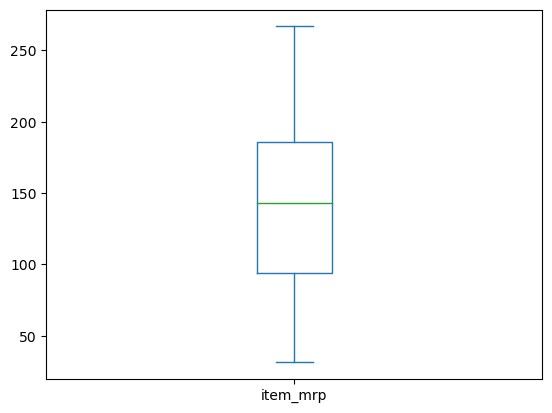

In [72]:
# pembuatan boxplot
df.item_mrp.plot(kind='box')

tidak ada outlier yang terlihat pada boxplot kolom item mrp

c:\Users\ravin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item_mrp', ylabel='Density'>

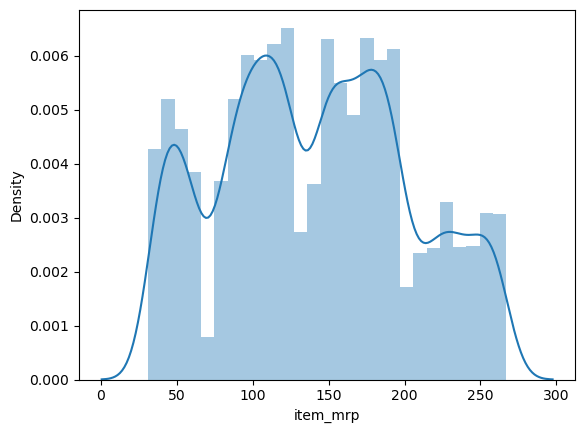

In [73]:
# plot distribusi rata rataharga barang
sns.distplot(df.item_mrp)

In [74]:
# central tendency dari harga barang

print('Nilai mean dari Item Max Retail Price (Item MRP) adalah      :', df.item_mrp.mean())
print('Nilai median dari Item Max Retail Price (Item MRP) adalah    :', df.item_mrp.median())
print('Nilai mode dari Item Max Retail Price (Item MRP) adalah      :', df.item_mrp.mode()[0])

Nilai mean dari Item Max Retail Price (Item MRP) adalah      : 140.9927819781768
Nilai median dari Item Max Retail Price (Item MRP) adalah    : 143.0128
Nilai mode dari Item Max Retail Price (Item MRP) adalah      : 172.0422


In [75]:
# skewness dari data
df.item_mrp.skew()

0.1272022683110526

Tingkat skewness hanya 0.12 saja, ini berarti grafik masih bisa dikategorikan sebagai Normal Distribution

In [76]:
# menghitung confidence level

ci_df = stats.norm.interval(0.95, df.item_mrp.mean(), df.item_mrp.std()) # Mneghitung Convidence Interval

print(ci_df[1], '\n')

print(df.item_mrp.mean())

263.0496694769064 

140.9927819781768


c:\Users\ravin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


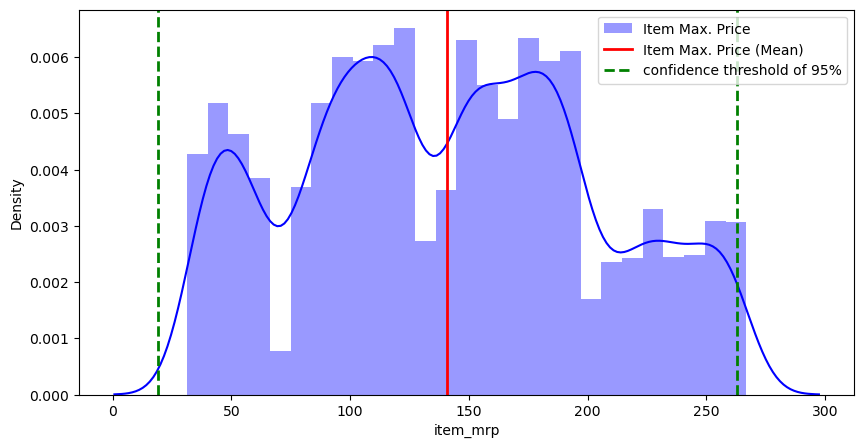

In [77]:
# plotting confidence interval

data_l = np.random.normal(df.item_mrp.mean(), df.item_mrp.std(),1000)

ci = stats.norm.interval(0.95, df.item_mrp.mean(), df.item_mrp.std())

plt.figure(figsize=(10,5))

sns.distplot(df['item_mrp'], label='Item Max. Price', color='blue')

plt.axvline(df.item_mrp.mean(), color='red', linewidth=2, label='Item Max. Price (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2,)


plt.legend()

In [79]:
df.item_mrp.max()

266.8884

**Insight** 
- Dari perhitungan diatas dapat disimpulkan bahwa nilai harga maksimum rata rata sebaiknya diatas 263.04 USD agar bisa dikatakan signifikan dan agar rata rata harga maksimal toko sleama ini benar benar bisa dikatakan meningkat.

In [78]:
# testing p value dengan nila mean 141 sesuai mean harga

t_stat,p_val = stats.ttest_1samp(df.item_mrp, 141)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.9914627250697885
t-statistics: -0.010700405476432896


## Problem Statement dan SMART ! 

Problem Statement : Franchise Toko Big Store sedang mengalami kemunduran revenue, dari data, buatlah analisa dan rekomendasi yang tepat. 

SMART ANALYSIS

1. Specific         : Ingin menaikkan penjualan dan revenue di akhir taun 2014 sebanyak 30%


2. Measurable       : 
                        
    - Q1 2014    : Menambah variasi item item yang memiliki potensi jual yang tinggi seperti Seafood an Starchy Food   

    - Q2 2014    : Menaikkan harga secara bertahap sampai Q4 

    - Perlahan menambahkan jenis produk dengan kategori rendah lemak mensesuaikan dengan trend 2013 yang ada. 

    - Perlahan mencari investor untuk membuka toko baru dengan tipe toko yang direkomendasikan


3. Attainable       :   Adanya potensi penjualan yang baik dilihat dari harga rata rata maksimum yang berbanding lurus dengan penjualan dan ketersediaan data yang memadai



4. Relevant          : Bila secara baik dapat memanfaatkan potensi-potensi item dan tipe toko yang ada, maka akan berdampak pada meningkatnya penjualan begitupula revenue dalam jangka panjang.


5. Time.bound       : Di akhir taun 2014

## Rekomendasi 

Dari penjabaran masalah dan problem statement, rekomendasi yang bisa diberikan adalah :
- Rekomendasi produk :
    - dari hasil analisa diatas, penulis merekomendasikan untuk produk dengan kategori Seafood dan Starfcy food agar bisa dikembangkan lagi variasinya, tentu karena melihat tingkat penjualan rata rata yang tinggi walaupun variasinya tidak sebanyak produk kategori lain. 
    - Untuk produk dengan tinkat kadar lemak low fat, bisa tetap menjadi andalah di pasar, tambahkan variasinya dan stocknya juga.
    - Rekomendasi dari segi harga, lebih baik ditingkatkan dinaikkan saja sampai rata rata nilai maksimum seluruh produk diatas 263.04 USD. Seharusnya ini dapat diimplementasikan secara teoritis, karena secara umum tidak adanya korelasi negatif antara harga maksimum barang dan jumlah penjualan.


    .

- Rekomendasi tempat :  jikalau suatu saat ingin membuka toko baru, bukalah tipe Supermarket 1 karena menurut data penjualan, supermarket tipe 1 adalah yang paling tinggi nilai penjualannya. Untuk ukuran toko dan letak kota, penulis rasa tidak ada pengaruh yang signifikan.